In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown as md
from scipy import linalg
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
from scipy import stats
from scipy.stats import norm

%matplotlib inline
%config InlineBackend.figure_format='retina'

## Homework-3

In [218]:
data = np.loadtxt('./data.csv', delimiter=',')
x = data[:,0]
y = data[:,1]

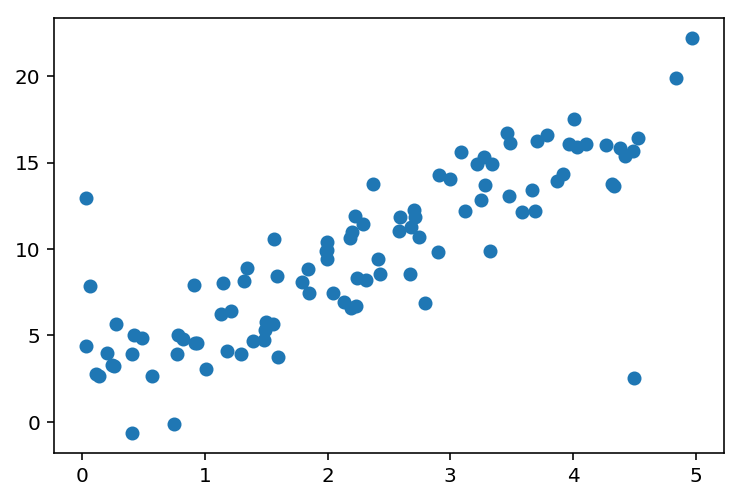

In [219]:
plt.scatter(x, y)

Approximate by a linear model $ax+b$

Loss function: 

$$
F(a, b) = \sum_{i=1}^n(y_{i}-(ax_{i}+b))^2
$$

$
\frac{\partial F}{\partial a} = (\sum_{i=1}^n(y_i - (ax_i+b))^2)^{\prime} = \sum_{i=1}^n[2(y_i-(ax_i+b))(y_i-(ax_i+b))^{\prime}] =\\ 2\sum_{i=1}^n[(y_i-ax_i-b)(0-(x_i+0))] = 2\sum_{i=1}^n[(y_i-ax_i-b)(-x_i)]=\\ 2\sum_{i=1}^n(ax_i^2+bx_i-x_iy_i)
$

$
\frac{\partial F}{\partial b} = (\sum_{i=1}^n(y_i - (ax_i+b))^2)^{\prime} = \sum_{i=1}^n[2(y_i-(ax_i+b))(y_i-(ax_i+b))^{\prime}] =\\ 2\sum_{i=1}^n[(y_i-ax_i-b)(0-(0+1))] = 2\sum_{i=1}^n(ax_i+b-y_i)
$

$
\begin{cases}
2\sum_{i=1}^n(ax_i^2+bx_i-x_iy_i) =0 \\
 2\sum_{i=1}^n(ax_i+b-y_i) =0
\end{cases}
$

$
\begin{cases}
a\sum x^2_{i}+b\sum x_{i} = \sum x_{i}y_{i} \\
a \sum x_{i}+bn = \sum y_{i}
\end{cases}
$

In [120]:
sum_x2 = np.sum(np.power(x,2))
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_xy = np.sum(x*y)

In [114]:
s = r'''
\begin{cases}
%(sum_x2)d a+%(sum_x)d b = %(sum_xy)d \\
%(sum_x)d a +%(n)d b = %(sum_y)d
\end{cases}
'''

In [115]:
md(s%{'sum_x2':sum_x2, 'sum_x':sum_x, 'sum_xy':sum_xy, 'sum_y':sum_y, 'n':X.size})


\begin{cases}
698 a+228 b = 2744 \\
228 a +100 b = 228
\end{cases}


In [220]:
a,b = linalg.solve(np.array([[sum_x2, sum_x], [sum_x, X.size]]), np.array([sum_xy, sum_y]))

In [139]:
def lstsq(x, y):
    sum_x2 = np.sum(np.power(x,2))
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x*y)

    return linalg.solve(np.array([[sum_x2, sum_x], [sum_x, X.size]]), np.array([sum_xy, sum_y]))

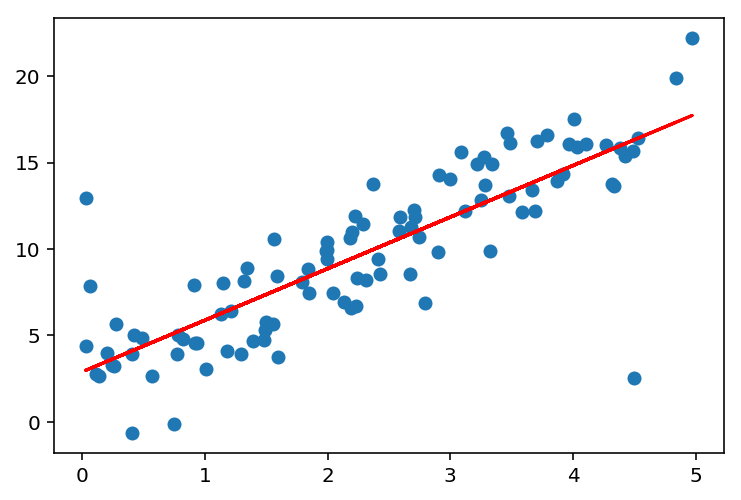

In [123]:
plt.scatter(x, y)
plt.plot(x, a*x+b,c='red')

In [195]:
mean_squared_error(y, a*x+b)

6.89957627321827

### Outliers

In [242]:
diff = y - (a*x+b)
mu = np.mean(diff)
sig = np.std(diff)

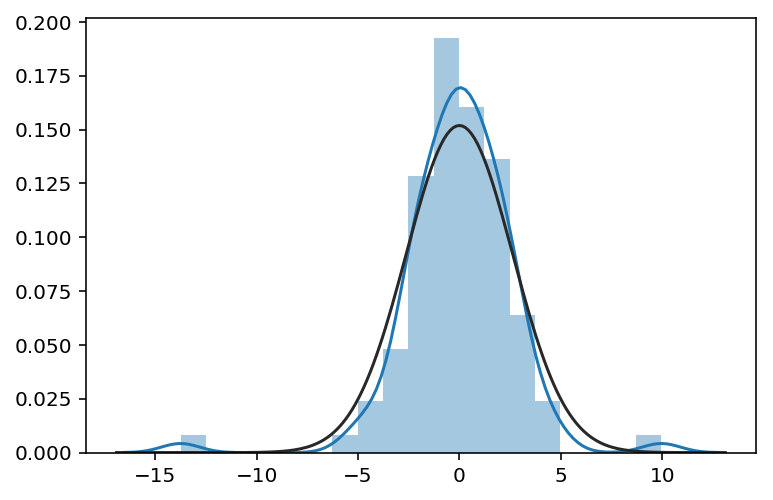

In [243]:
sns.distplot(diff, fit=norm)

In [249]:
outlier_mask = ((diff > mu-3*sig*0.5) & (diff < mu+3*sig*0.5))

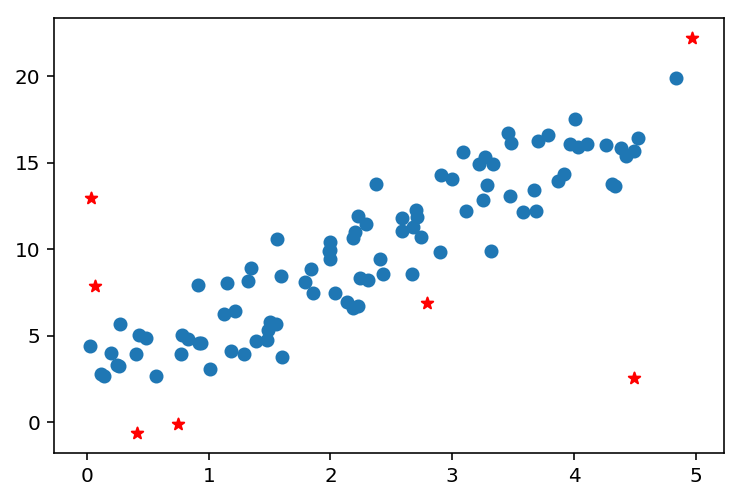

In [250]:
plt.scatter(x[~outlier_mask], y[~outlier_mask], c='red', marker='*')
plt.scatter(x[outlier_mask], y[outlier_mask])

In [246]:
a, b = lstsq(x[outlier_mask], y[outlier_mask])

In [251]:
mean_squared_error(y[outlier_mask], a*x[outlier_mask]+b)

3.205951868937312

In [247]:
print(a,b)

3.5671520367588365 1.6554936178052295


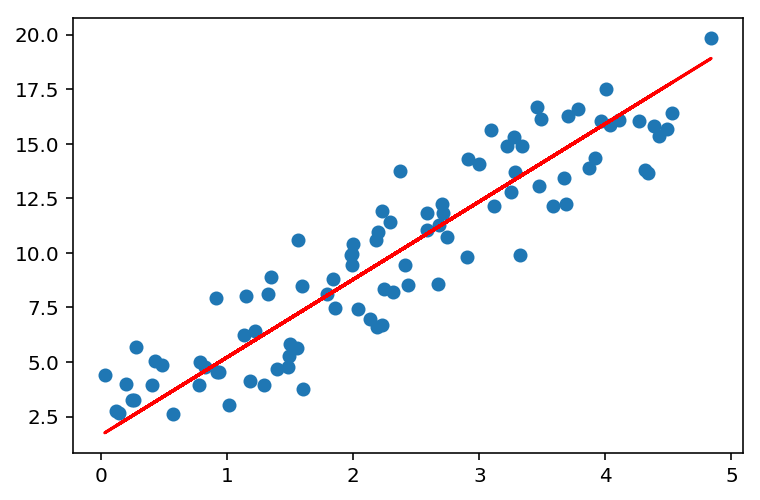

In [252]:
plt.scatter(x[outlier_mask], y[outlier_mask])
plt.plot(x[outlier_mask], a*x[outlier_mask]+b, c='red')

In [253]:
mean_squared_error(y[outlier_mask], a*x[outlier_mask]+b)

3.205951868937312

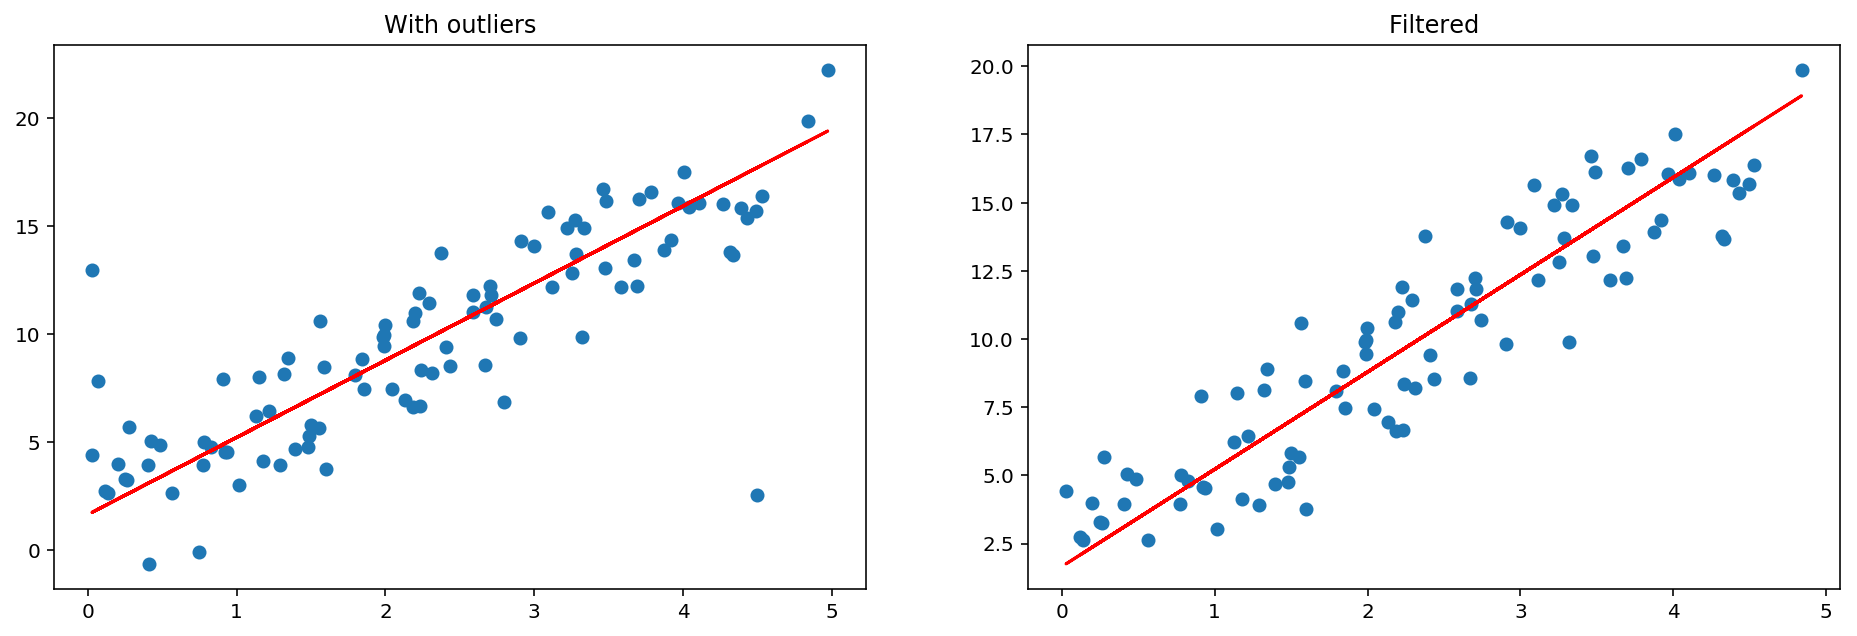

In [254]:
fig, axes = plt.subplots(1, 2, figsize=(16,5))

axes[0].set_title('With outliers')
axes[0].scatter(x, y)
axes[0].plot(x, a*x+b,c='red')

axes[1].set_title('Filtered')
axes[1].scatter(x[outlier_mask], y[outlier_mask])
axes[1].plot(x[outlier_mask], a*x[outlier_mask]+b, c='red')

As a result, we get improvements up to 2x:

MSE: 6.899

MSE(filtered): 3.20

## Gradient descent

In [207]:
def f(x,a,b):
    return a*x+b

Loss function

$$
L = \frac{1}{n}\sum_{i=0}^{n}(y_i - (ax_i+b))^2
$$

Calculate the partial derivative of the loss function

$$
\frac{\partial F}{\partial a} = \frac{1}{n}\sum_{i=0}^{n}2(y_i-(ax_i+b))(-x_i)=\frac{-2}{n}\sum_{i=0}^{n}x_i(y_i-(ax_i+b))
$$

$$
\frac{\partial F}{\partial b} = \frac{-2}{n}\sum_{i=0}^{n}(y_i-(ax_i+b))
$$

In [213]:
a = 0
b = 0

eta = 0.0001
epochs = 1000

n = float(len(x))

for i in range(epochs): 
    y_pred = a*x + b
    D_a = (-2/n) * np.sum(x * (y - y_pred))
    D_b = (-2/n) * np.sum(y - y_pred)
    a = a - eta * D_a
    b = b - eta * D_b
    
print (a, b)

2.7766316321920845 1.0221638858909574
